## Models for Predicting Happiness across countries

Github Repo link: 

In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3

### Loading the data

In [78]:
#read in the csv files for the model competition on AI modelshare
import pandas as pd
X_train = pd.read_csv('/content/X_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_train = pd.read_csv('/content/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

In [80]:
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


### Bivariate analysis of the data

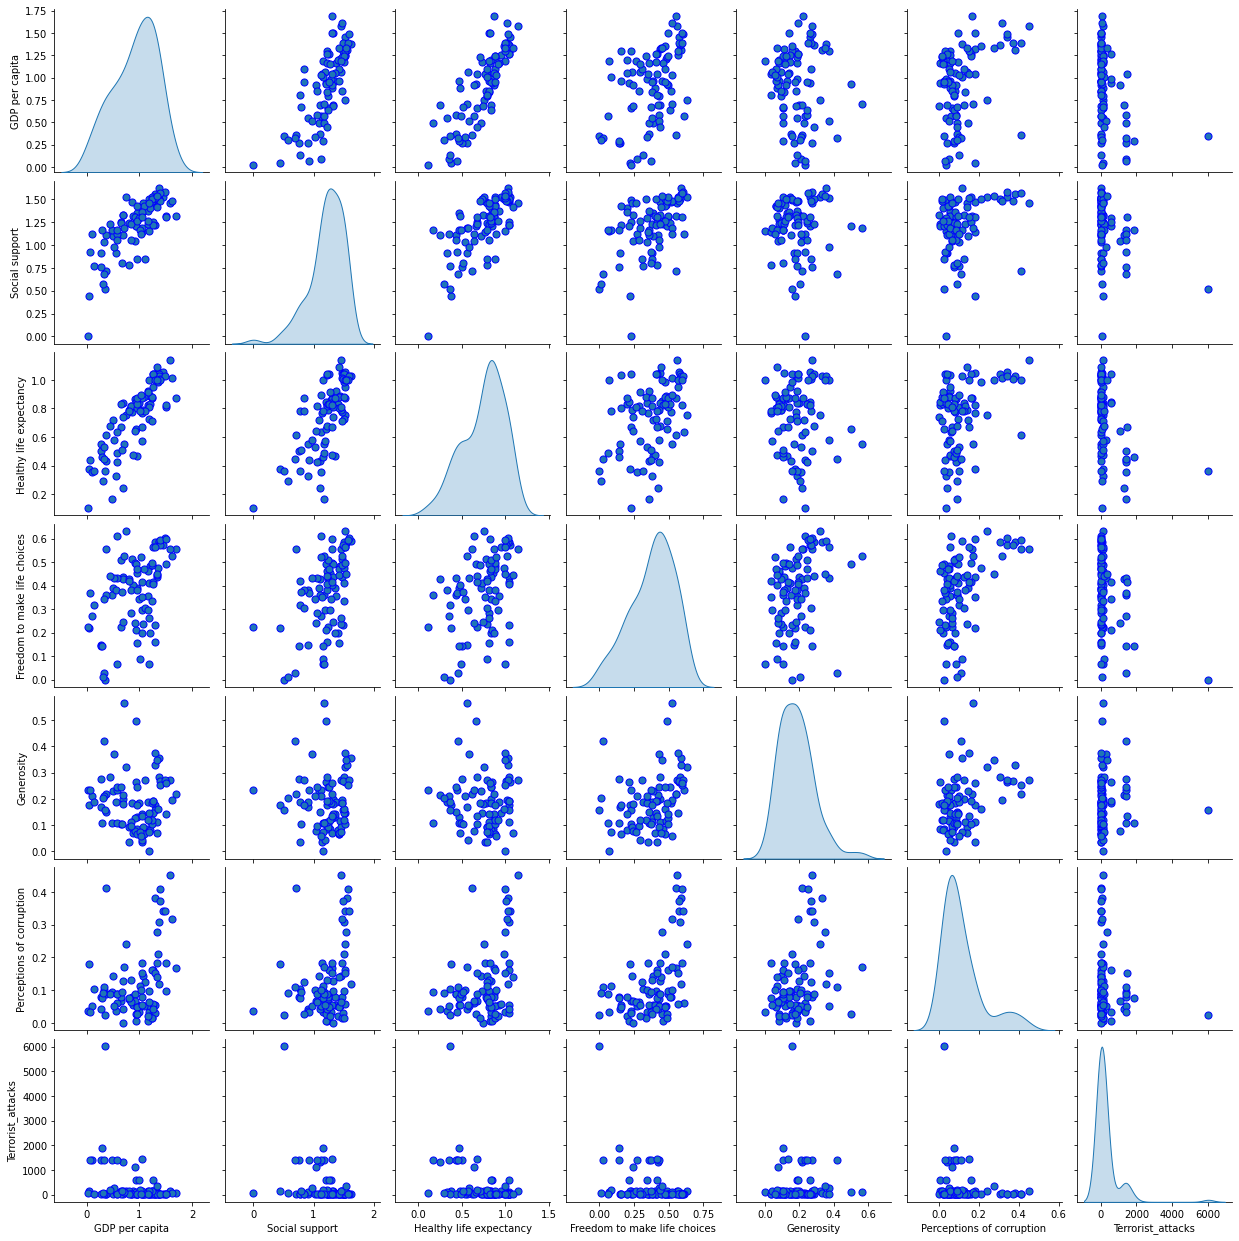

In [26]:
# We initialize the bivariate analysis with a pair plot of the data
sns.pairplot(X_train, diag_kind="kde",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

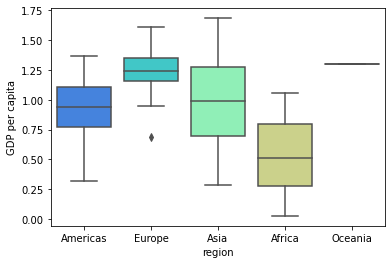

In [24]:
#Box plots to explore some relathinships between region and other factors
import seaborn as sns
sns.boxplot(x=X_train['region'], y=X_train['GDP per capita'], palette='rainbow')


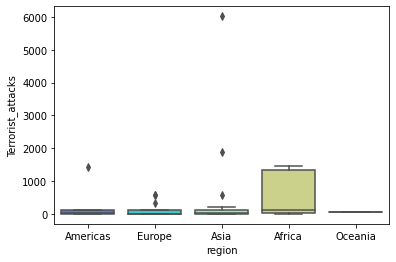

In [27]:
#Given the pairs plot explring the realtionship of terrisrist attacks and region might be interesting 
import seaborn as sns
sns.boxplot(x=X_train['region'], y=X_train['Terrorist_attacks'], palette='rainbow')

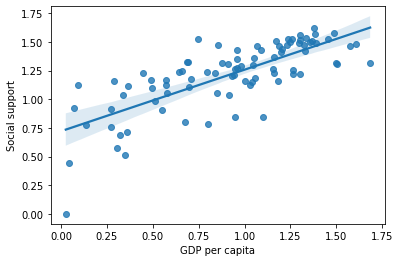

In [29]:
#Making a Reg plot to explore the relathionship between GDP per capita and other factors
sns.regplot(x=X_train['GDP per capita'],y=X_train['Social support'])

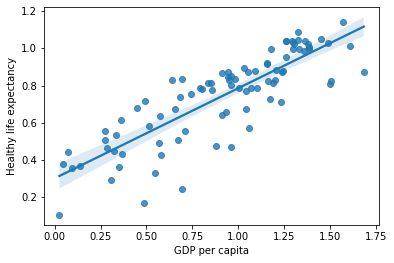

In [30]:
sns.regplot(x=X_train['GDP per capita'],y=X_train['Healthy life expectancy'])

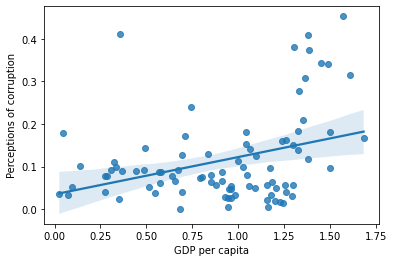

In [32]:
sns.regplot(x=X_train['GDP per capita'],y=X_train['Perceptions of corruption'])

From the above Bivariate analysis we can see that GDP per capita has a positive and posibly linear relationship with all of the other variables in the data set. Exploring auto correlation between income and the other variables might be an important subsequent task. The regression plot between GDP per capita and perception of corruption caught my attention as the graph shows a positive relathionship. this result is interesting as it seems to be expected otherwise; as welthier countris tend to have lower levels of corruption. Beside GDP per capita there does not seem to be annother variable that have a defined linear realtionship with other variables in the data set. We can resonably expect to see a positive relationship between happines and higher values if helth, income, freedom and generosity; while lowere levels of corruption and terrorism can also reasonably expect to increase national happiness levels

### Examination of the data using models that allow for feature selection

In [81]:
# We performe a Recursive feature elimination on the data 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#Keep numeric feature for the selection process
X_train_num=X_train[['GDP per capita', 'Social support',	'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']]

#we scale the numeric feature for the selection process
X_train_num_scaled=scale(X_train_num)

# create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_num_scaled, y_train)
rfe.ranking_

array([1, 7, 3, 5, 6, 2, 4])

In [82]:
# We then usa a recursive feature elimination model in the feature selection process to select the important features
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import scale

rfe = RFECV(LinearRegression(), cv=10)
rfe.fit(X_train_num_scaled, y_train)
print(rfe.support_)


[ True False  True False False  True  True]


The above models point to the fact that the most important feature in the slection process is GDP per capita, as our initial bivariate analysis suggested. However, these models also point to terror attacks as an important feature for determining national happines. That result is interesting as most of terror attacks are concentrated in Africa, we can see from the box plot above. It can be that these countris have a lower GDP per capita while the terror attacks are concentrated there so the feature seems important. However, there could be autocorrelation with GDP per capita. The other important features do not surprise me as these seemed to have importance in the intianl analysis. 

### Prediction models for world happiness

#### Preprocess the data

In [90]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a procesing pipeline for the data 
numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [91]:
#Write a function that transforms the data with the above preporocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [47]:
# Fit the processes data to the training set and check the shape 
preprocessor(X_train).shape

(88, 26)

### Fit a model on preprocessed data and upload to AI modelshare

#### Model 1: Random Forest Classifier

In [54]:
#first model is a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9431818181818182

In [63]:
import aimodelshare as ai

#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [64]:
#Set credentials using modelshare.org username/password
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [65]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [66]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): Random Forest
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 779

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Model 2: Support vector classifier

In [93]:
# we try our first model as a SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8409090909090909

In [94]:
#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [95]:
#Set credentials using modelshare.org username/password
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [96]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [97]:
#Submit Model 2: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): Model 2
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 791

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


#### Model 3: Logistic regression 

In [103]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=.07, penalty='l2')
model.fit(preprocessor(X_train), y_train_labels) 
model.score(preprocessor(X_train), y_train_labels) 

0.75

In [104]:
#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [105]:
#Set credentials using modelshare.org username/password
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [106]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [107]:
#Submit Model 3: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): Model 3
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 795

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Post-Dicussion models

#### Model 1b: Random Forest Classifier 

In [167]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=6)
model.fit(preprocessor(X_train), y_train_labels) 
model.score(preprocessor(X_train), y_train_labels) 

0.9659090909090909

In [168]:
#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_1b.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [169]:
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [170]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [171]:
#Submit Model 1b: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_1b.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels, 
                                 custom_metadata={'team':'2'})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 854

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


Model 2b: Support vector classifier

In [125]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(C=1.8, kernel='rbf', degree=6, gamma='scale')
model.fit(preprocessor(X_train), y_train_labels) 
model.score(preprocessor(X_train), y_train_labels) 

0.875

In [126]:
#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_2b.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [127]:
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [128]:
#Submit Model 2b: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_2b.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional):  
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 806

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Model 3b: KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, weights= 'uniform', p=1)
model.fit(preprocessor(X_train), y_train_labels) 
model.score(preprocessor(X_train), y_train_labels) 

0.7613636363636364

In [163]:
#save progress to local zip 
ai.export_preprocessor(preprocessor,"") 

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_3b.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

Your preprocessor is now saved to 'preprocessor.zip'


In [165]:
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [166]:
#Submit Model 3b: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_3b.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 828

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164
